# Checking the GPU.

In [31]:
import tensorflow as tf 
# Checking GPU access
print(tf.config.list_physical_devices('GPU'))

[]


In [ ]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
import unicodedata
import re
import numpy as np
import pandas as pd
import os
import io
import time
import pickle

In [ ]:
# Reading the firts data
df = pd.read_csv("C:/Users/99451/Desktop/sdp_sentences/dataset.csv")
df = df[["original", '                              correct']]

In [3]:
df.columns = ["original", "corect"]

In [4]:
df.head()

,original,corect
0,NaN,NaN
1,salam. mən plastik kartı necə onlayn sifar...,"Salam, mən plastik kartı necə onlayn sifari..."
2,niye,niyə
3,türkiyənin bank kartina,Türkiyənin bank kartına
4,mene cek cixardir ki blok olunub kartiniz,"Mənə çek çıxardır ki, blok olub kartınız ."


In [5]:
# The mistake of labeling
df.iloc[1046,:]

original     spasibo
corect      sağ olun
Name: 1046, dtype: object

In [6]:
df.drop(1046, axis=0, inplace=True)

In [7]:
# We have deleted it 
df.iloc[1046,:]

original     2017de bitib kartin vaxti
corect      2017-də bitib kartın vaxtı
Name: 1047, dtype: object

In [8]:
df.shape

(72311, 2)

In [9]:
df.isna().sum() # We have 3 Na in "original" column and 40 Na in "correct" column. 

original     3
corect      40
dtype: int64

In [10]:
df[df.isnull().any(axis=1)] # The rows where we have NaN  

,original,corect
0,NaN,NaN
14959,işlemler olsun banka karti götürmeye gelerem,NaN
14966,salam hormetli emekdas 190 kanatla baqli yazir...,NaN
15102,men faizleri evvel alacam deposizde?,NaN
15465,birde zehmet olmasa nece odenis edimki goturul...,NaN
56574,Deyir neceb shuba almirsan?😂Mene haa ozde😂 Hey...,NaN
58770,"1 ayın söhbətidi,yoldaşım axşam işdən evə qayı...",NaN
58796,"Gedib yapışıb adamdan saqqız kimi,sonra da dey...",NaN
58876,Mən də yuxuda görürəm ki min əziyyətlə Azərbay...,NaN
58902,bu gün Azərbaycanın son illərdə qazandığı böyü...,NaN


In [11]:
# Deleting these rows
df = df[~df.isnull().any(axis=1)].reset_index(drop=True)

In [12]:
# Now we do not have NaN values
df.isna().sum()

original    0
corect      0
dtype: int64

In [13]:
df.iloc[14378, :]

original    hə qadanalım çox sağolun 😊
corect               hə çox sağ olun 😊
Name: 14378, dtype: object

In [14]:
df.index

RangeIndex(start=0, stop=72271, step=1)

In [15]:
df.iloc[14378, 1]

'hə çox sağ olun 😊'

In [16]:
df.shape

(72271, 2)

In [17]:
# If all of text consists of numbers save their indexes
num_row_indexes = [] 
for i in range(df.shape[0]):
  if df.iloc[i, 0].isnumeric() and df.iloc[i, 1].isnumeric():
    num_row_indexes.append(i)

In [18]:
df.iloc[num_row_indexes, :]

,original,corect
4,329327329327,329327329327
77,2500,2500
219,650,650
312,18,18
358,0555050555054627,0555050555054627
...,...,...
18435,156630156630,156630156630
18462,15000,15000
18587,300,300
18588,5000,5000


In [19]:
# Deleting these indexes
df.drop(num_row_indexes, axis=0, inplace=True)

In [20]:
df.shape

(72082, 2)

In [21]:
# finding <something pattern>
df.reset_index(drop=True,inplace=True)
hiding_info_indexes = [] 
for i in range(df.shape[0]):
  if re.findall("<[\s\S]*?>", df.iloc[i, 0]) or re.findall("<[\s\S]*?>", df.iloc[i, 1]):
    hiding_info_indexes.append(i)

In [22]:
df.iloc[hiding_info_indexes, :]

,original,corect
422,xanim men kredit ucun muraciet etmey istiyirem...,Xanım mən kredit üçün müraciət etmək istəyir...
687,salam telefonda uni bank kodu aca bilmirem usa...,"Salam, telefonda unibank kodu aça bilmirəm u..."
1015,kreditle bagli narahat edirem sizden mene cava...,kreditlə bağlı narahat edirəm sizdən mənə cava...
1053,salam men uniden debet kartim var sexisi həsab...,"Salam, mən unidən debet kartım var şəxsi hes..."
1187,dənizdə işlədiyimə görə 19.09.2020 isə gedirəm...,dənizdə işlədiyimə görə 19.09.2020 işə gedirəm...
...,...,...
18111,<first_name> <first_name> <first_name> oglu <f...,<first_name> <first_name> <first_name> oğlu <f...
18162,salam. müddətli əmanət depoziti şərtlərində 12...,"Salam, müddətli əmanət depoziti şərtlərində 12..."
18230,təşəkurlər mənim öz kartım var dərvişov <first...,təşəkkürlər. Mənim öz kartım var Dərvişov <fir...
18260,6 <first_name> tarixinde kartima pul gonderili...,6 <first_name> tarixində kartıma pul göndərili...


In [23]:
df.iloc[hiding_info_indexes, :].shape[0]

132

In [24]:
# Droping tehese indexes
df.drop(hiding_info_indexes, axis=0, inplace=True)
df.reset_index(drop=True,inplace=True)

In [25]:
df.shape

(71950, 2)

In [26]:
# If there is one word let's see them
one_letter_index = [] 
investigation = []
for i in range(df.shape[0]):
  if len(df.iloc[i, 0].split()) == 1 and not re.sub(r'[^\w\s]', '', df.iloc[i, 0]).isalpha():
    if "alam" in df.iloc[i, 0]:
      print(df.iloc[i, 0], "birinci if")
    one_letter_index.append(i)
  elif len(df.iloc[i, 1].split()) == 1 and not re.sub(r'[^\w\s]', '', df.iloc[i, 1]).isalpha():
    one_letter_index.append(i)

ortalama  birinci if
siralama  birinci if
Salamzade  birinci if
sadalamaq  birinci if
siralamaq  birinci if
imzalamaqa  birinci if
parcalamaq  birinci if
salamlayir  birinci if
salamatdir  birinci if
ortalamasi  birinci if
saq-salamat  birinci if
imzalamisdi  birinci if
parcalamaqa  birinci if
imzalamisdir  birinci if
eleyhissalam  birinci if
siqortalamaq  birinci if
eleyhis-salam  birinci if


In [27]:
df.iloc[one_letter_index, :]

,original,corect
29,5478frt,5478frt
110,5d7x85r,5d7x85r
248,6l5lf4,6l5lf4
565,gtrs54g,gtrs54g
814,fdri45k,fdri45k
...,...,...
71711,…,…
71729,…,…
71761,…,…
71828,:),:)


In [28]:
have_to_delete = [29, ]

In [29]:
"kredit?".isalpha()

False

In [30]:
re.sub(r'[^\w\s]', '', df.iloc[i, 0]).isalpha()

False

In [ ]:
len("salam ala".split()) == 1 and not re.sub(r'[^\w\s]', '', "salam ala").isalpha()

In [ ]:
not_delete = [6876, 1424, 1430, 9658, 9643, 10318, 10389, 11778, 11779, 14957, 15404, 15479, 16045, 17354, 17371, 17568, 18697, 16045, 17371, 10389, 12229, 9658, 8091, 3847]

In [36]:
# Droping one letter indexes
df.drop(one_letter_index, axis=0, inplace=True)
df.reset_index(drop=True,inplace=True)

In [31]:
test = df.iloc[14224-323+5, :]["original"]

In [32]:
test

'mən 510 manat vurdum 51 azn tutdu niyə?'

In [33]:
# <first_name> falan-i regexle tapmaq  +
# Emojileri tapmaq ve silemek +
# sstrip elemek butun hamisini +
# i leri evez elemek Ahmad-in kodunda var hemen hisse


In [34]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
# function for preprocessing sentences
def preprocess_sentence(w):
  #w = unicode_to_ascii(w.lower().strip())
  w=str(w)
  w = remove_emojis(w)
  w = w.strip()
  # creating a space between a word and the punctuation following it
  # eg: "he is a boy." => "he is a boy ."
  # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
  w = re.sub(r"([?.!,¿])", r" \1 ", w)
  w = re.sub(r'[" "]+', " ", w)

  # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
  w = re.sub(r"[^a-zA-Z?.!,¿]+yüukenqşhzxjfıvaproldcgəçsmitğböYÜUKENQŞHZXJFIVAPROLDCGƏÇSMİTĞBÖ", " ", w)

  w = w.strip()

  # adding a start and an end token to the sentence
  # so that the model know when to start and stop predicting.
  #w = '<start> ' + w + ' <end>'
  w = '< ' + w + ' >'
  return w

In [35]:
preprocess_sentence("Cavab vərmirsiz ama 😕")

'< Cavab vərmirsiz ama >'

In [36]:
for i in range(df.shape[0]):
  df['original'][i] = preprocess_sentence(df['original'][i])
  df['corect'][i] = preprocess_sentence(df['corect'][i])

In [37]:
df.head()

,original,corect
0,< salam . mən plastik kartı necə onlayn sifari...,"< Salam , mən plastik kartı necə onlayn sifari..."
1,< niye >,< niyə >
2,< türkiyənin bank kartina >,< Türkiyənin bank kartına >
3,< mene cek cixardir ki blok olunub kartiniz >,"< Mənə çek çıxardır ki , blok olub kartınız . >"
4,< ygun xanim salam sabahiniz xeyir olsun >,"< Aygün xanım , Salam , sabahınız xeyir olsun ! >"


In [38]:
df.tail()

,original,corect
71945,< Qəşəng söyərdim bunu yeri deyil >,< Qəşəng söyərdim bunu yeri deyil >
71946,< Mədəni ol >,< Mədəni ol >
71947,"< Filmlər o qədər möhtəşəm şeylərdir ki , tari...","< Filmlər o qədər möhtəşəm şeylərdir ki , tari..."
71948,< Mənə niyə telefonu cevirttirdinnnn ! ! ! ;dd >,< Mənə niyə telefonu cevirttirdinnnn ! ! ! ;dd >
71949,"< Yaxşı muğam oxuyan ola , oturasan böyründə ,...","< Yaxşı muğam oxuyan ola , oturasan böyründə ,..."


In [39]:
df.iloc[17499, :]

original    < fevralin 1 i bankadan zeng elediler ki odeni...
corect      < Fevralın 1-i bankdan zəng eledilər ki , ödən...
Name: 17499, dtype: object

In [40]:
df.drop(17499, axis=0, inplace=True)

In [41]:
# Shuffling the data
shuffled_data = df.sample(frac=1).reset_index(drop=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(shuffled_data['original'], shuffled_data['corect'],test_size = 0.1)
len(X_train),len(y_train), len(X_test), len(y_test)

(64754, 64754, 7195, 7195)

In [43]:
# finding average sentence lenght
def average_length(data):
  avg_length = np.mean([len(x) for x in data])
  return int(avg_length)

def max_length(data):
  max_ = max([len(x) for x in data])
  return int(max_)
#Training data
average_length_input = average_length(X_train)
average_length_output = average_length(y_train)

#Test data
average_length_input_test = average_length(X_test)
average_length_output_test = average_length(y_test)

In [44]:
average_length_input, average_length_output

(34, 34)

In [45]:
# Creating and applying tokenizers, pad_sequences for input data
inputTokenizer = Tokenizer(char_level=True, split=' ',filters='', lower=False)
inputTokenizer.fit_on_texts(X_train)
Eword2index = inputTokenizer.word_index
vocab_size_source = len(Eword2index) + 1

X_train = inputTokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=average_length_input, padding='post')

X_test = inputTokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = average_length_input, padding='post')




In [46]:
X_train

array([[13,  1, 26, ...,  0,  0,  0],
       [ 1, 20,  4, ...,  5,  1, 12],
       [13,  1, 25, ...,  0,  0,  0],
       ...,
       [ 7, 19,  1, ..., 56,  1, 12],
       [13,  1, 54, ...,  0,  0,  0],
       [13,  1, 19, ...,  0,  0,  0]])

In [47]:
# Creating and applying tokenizers, pad_sequences for output data
outputTokenizer = Tokenizer(char_level=True, split=' ',filters='', lower=False)
outputTokenizer.fit_on_texts(y_train)
Mword2index = outputTokenizer.word_index
vocab_size_target = len(Mword2index) + 1

y_train = outputTokenizer.texts_to_sequences(y_train)
y_train = pad_sequences(y_train, maxlen=average_length_output, padding='post')

y_test = outputTokenizer.texts_to_sequences(y_test)
y_test = pad_sequences(y_test, maxlen = average_length_output, padding='post')


In [48]:
# converting to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [49]:
# importing necessery libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from string import digits
import re
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Input, Dense,Embedding, Concatenate, TimeDistributed
from tensorflow.keras.models import Model,load_model, model_from_json
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K 
import pickle as pkl
import numpy as np

In [50]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

logger = tf.get_logger()

class AttentionLayer(tf.keras.layers.Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs

        logger.debug(f"encoder_out_seq.shape = {encoder_out_seq.shape}")
        logger.debug(f"decoder_out_seq.shape = {decoder_out_seq.shape}")

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            logger.debug("Running energy computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_full_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim

            logger.debug(f"U_a_dot_h.shape = {U_a_dot_h.shape}")

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)

            logger.debug(f"Ws_plus_Uh.shape = {Ws_plus_Uh.shape}")

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            logger.debug(f"ei.shape = {e_i.shape}")

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            logger.debug("Running attention vector computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_full_seq * K.expand_dims(inputs, -1), axis=1)

            logger.debug(f"ci.shape = {c_i.shape}")

            return c_i, [c_i]

        # we don't maintain states between steps when computing attention
        # attention is stateless, so we're passing a fake state for RNN step function
        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e], constants=[encoder_out_seq]
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c], constants=[encoder_out_seq]
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [51]:
# model architecture
K.clear_session() 
latent_dim = 300 

# Encoder 
encoder_inputs = Input(shape=(average_length_input,)) 
enc_emb = Embedding(vocab_size_source, latent_dim, trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,return_state=True) 
encoder_outputs, state_h, state_c = encoder_lstm1(enc_emb) 

# #LSTM 2 
# encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
# encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

# #LSTM 3 
# encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
# encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(vocab_size_target, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(vocab_size_target, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 34, 300)      60900       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, None, 300)    48600       ['input_2[0][0]']                
                                                                                              

In [52]:
plot_model(model, to_file='train_model.png', show_shapes=False, dpi=96)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [53]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [55]:
history = model.fit([X_train, y_train[:,:-1]], y_train.reshape(y_train.shape[0], y_train.shape[1],1)[:,1:], 
                    epochs=3, 
                    #callbacks=[es],
                    batch_size=40,
                    validation_data = ([X_test, y_test[:,:-1]], y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:,1:]))

Epoch 1/3
1619/1619 [==============================] - 1948s 1s/step - loss: 0.5680 - accuracy: 0.8455 - val_loss: 0.1377 - val_accuracy: 0.9634
Epoch 2/3
1619/1619 [==============================] - 2022s 1s/step - loss: 0.1174 - accuracy: 0.9690 - val_loss: 0.1096 - val_accuracy: 0.9718
Epoch 3/3
1619/1619 [==============================] - 2104s 1s/step - loss: 0.0942 - accuracy: 0.9752 - val_loss: 0.0981 - val_accuracy: 0.9744


In [56]:
model_json = model.to_json()
with open("Spell_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Spell_model_weight.h5")
print("Saved model to disk")

Saved model to disk


In [57]:
# loading the model architecture and asigning the weights
json_file = open('Spell_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_loaded = model_from_json(loaded_model_json, custom_objects={'AttentionLayer': AttentionLayer})
# load weights into new model
model_loaded.load_weights("Spell_model_weight.h5")

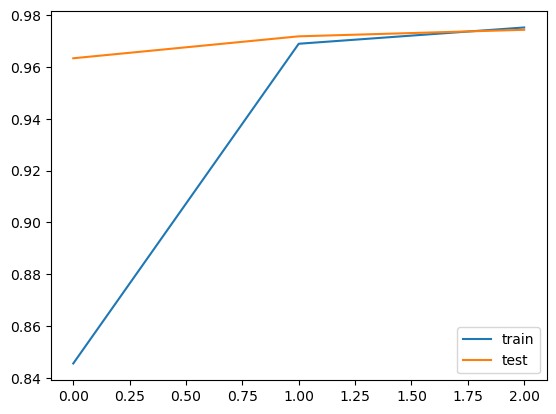

In [58]:
from matplotlib import pyplot 
pyplot.plot(history.history['accuracy'], label='train') 
pyplot.plot(history.history['val_accuracy'], label='test') 
pyplot.legend() 
pyplot.show()

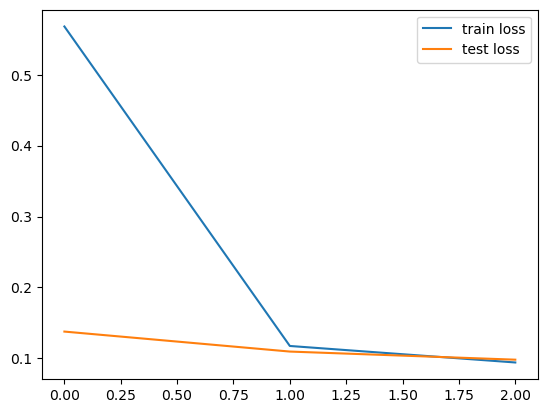

In [59]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train loss') 
pyplot.plot(history.history['val_loss'], label='test loss') 
pyplot.legend() 
pyplot.show()

In [60]:
model_loaded.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 34, 300)      60900       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, None, 300)    48600       ['input_2[0][0]']                
                                                                                              

In [61]:
Eindex2word = inputTokenizer.index_word
Mindex2word = outputTokenizer.index_word

In [62]:
latent_dim=300
# encoder inference
encoder_inputs = model_loaded.input[0]  #loading encoder_inputs
encoder_outputs, state_h, state_c = model_loaded.layers[4].output #loading encoder_outputs

print(encoder_outputs.shape)

encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(34,latent_dim))

# Get the embeddings of the decoder sequence
decoder_inputs = model_loaded.layers[1].output

print(decoder_inputs.shape)
dec_emb_layer = model_loaded.layers[3]

dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_lstm = model_loaded.layers[5]
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_layer = model_loaded.layers[6]
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])

concate = model_loaded.layers[7]
decoder_inf_concat = concate([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_dense = model_loaded.layers[8]
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

(None, 34, 300)
(None, None)


In [63]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq, verbose=0)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = Mword2index['<']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c], verbose=0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if sampled_token_index == 0:
          break
        else:
          sampled_token = Mindex2word[sampled_token_index]

          if(sampled_token!='>'):
              decoded_sentence += ''+sampled_token

              # Exit condition: either hit max length or find stop word.
              if (sampled_token == '>' or len(decoded_sentence.split()) >= (26-1)):
                  stop_condition = True

          # Update the target sequence (of length 1).
          target_seq = np.zeros((1,1))
          target_seq[0, 0] = sampled_token_index

          # Update internal states
          e_h, e_c = h, c

    return decoded_sentence

In [64]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=Mword2index['<']) and i!=Mword2index['>']):
        newString=newString+Mindex2word[i]+''
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+Eindex2word[i]+''
    return newString

In [65]:
i = 0
new_sample = np.array(pad_sequences(inputTokenizer.texts_to_sequences([shuffled_data['original'][i]]), maxlen=average_length_input, padding='post'))

In [66]:
new_sample.shape

(1, 34)

In [67]:
i = 15
new_sample = np.array(pad_sequences(inputTokenizer.texts_to_sequences([shuffled_data['original'][i]]), maxlen=average_length_input, padding='post'))
print("Actual: ", shuffled_data['original'][i])
print("\n")
print("Predicted summary:", decode_sequence(new_sample.reshape(1,34)))

Actual:  < vesaitlerinden >


Predicted summary:  vəsaitlərindən 


In [68]:
test1 = "emekdaw ile daniwdim dedi 4 iw gununde arawdiralacaq"
test2 = "ceta yazdi yuklenmedi indi baxiramki pul cixib."
test3 = "Hec bir banka odenisim yoxdur"
test4 = "her bir yerinde gul cicekle bayram"
olmayan1 = "en gozel ders bu dersdir"
olmayan2 = "yaxin adam orani qutarib"
#olmayan1 = "salam. beynelxalqbankin kartina pul kocurmek isteyrem 200 manatdan artıq kocmur gun erzinde"

In [70]:
given = olmayan2
new_sample = ["< " + given +" >"]
new_sample = np.array(pad_sequences(inputTokenizer.texts_to_sequences(new_sample), maxlen=average_length_input, padding='post'))
print("Predicted summary:", decode_sequence(new_sample.reshape(1, 34)))

Predicted summary:  yaxın adam oranı qutarıb 


In [71]:
given = test3
new_sample = ["< " + given +" >"]
new_sample = np.array(pad_sequences(inputTokenizer.texts_to_sequences(new_sample), maxlen=average_length_input, padding='post'))
print("Predicted summary:", decode_sequence(new_sample.reshape(1, 34)))

Predicted summary:  Heç bir banka ödənişim yoxdur 


In [72]:
given = olmayan1
new_sample = ["< " + given +" >"]
new_sample = np.array(pad_sequences(inputTokenizer.texts_to_sequences(new_sample), maxlen=average_length_input, padding='post'))
print("Predicted summary:", decode_sequence(new_sample.reshape(1, 34)))

Predicted summary:  Ən gözəl dərs bu dersdir 


In [107]:
new_sample

array([[1834,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]])